<a href="https://colab.research.google.com/github/varshathejes/web-document-classification-Newsreports/blob/main/Web_Doc_Classification_DMCAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD  # linear algebra technique used for dimensionality reduction.
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer  # text feature extraction-frequency-inverse document frequency (TF-IDF) method.
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer  # hashing trick and count-based method
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # evaluating the performance of classification models.
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

In [ ]:
data_train = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)
n_components = 5
labels = data_train.target
true_k = np.unique(labels).shape[0]

# Convert to TF-IDF format 
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(data_train.data)

# Reduce dimensions
svd = TruncatedSVD(n_components) #unique labels
normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)

# X_train = lsa.fit_transform(X_train)

print("Train data length: ", len(data_train.data))

# Order of labels in `target_names` can be different from `categories`
data_test = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)

target_names = data_train.target_names
print(target_names)

Train data length:  2034
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [ ]:
# Split a train set and test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the test data using the same vectorizer")
X_test = vectorizer.transform(data_test.data)
# X_test = lsa.fit_transform(X_test)

Extracting features from the test data using the same vectorizer


## Naive Bayes

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train.toarray(), y_train)

nb_pred = nb_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, nb_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

nb_pred = nb_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, nb_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 100.00%
Test accuracy score: 84.18%


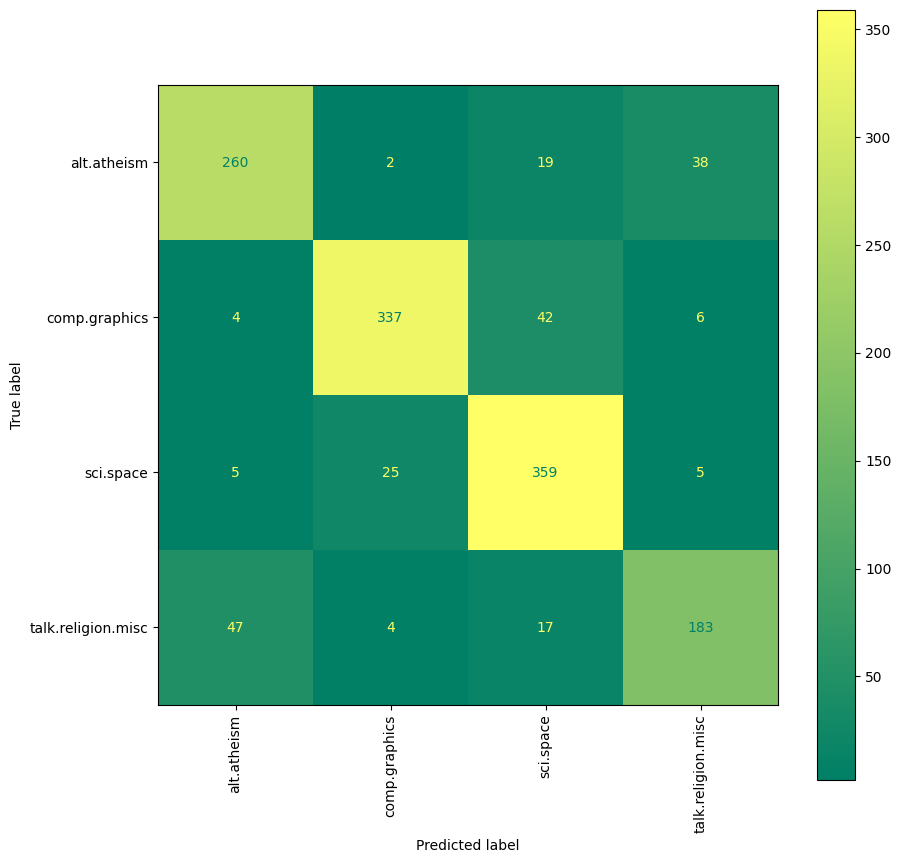

In [ ]:
# nb_pred = nb_clf.predict(X_test.toarray())
cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data_train.target_names
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, nb_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.822785,0.815047,0.818898,319.000000
1,0.915761,0.866324,0.890357,389.000000
2,0.821510,0.911168,0.864019,394.000000
3,0.788793,0.729084,0.757764,251.000000
accuracy,0.841833,0.841833,0.841833,0.841833
macro avg,0.837212,0.830406,0.832759,1353.000000
weighted avg,0.842839,0.841833,0.841241,1353.000000


#Support vector machine


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train.toarray(), y_train)

svm_pred = svm_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, svm_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

svm_pred = svm_clf.predict(X_test.toarray())
test_score1 = accuracy_score(y_test, svm_pred) * 100
print(f"Test accuracy score: {test_score1:.2f}%")

Train accuracy score: 99.95%
Test accuracy score: 88.62%


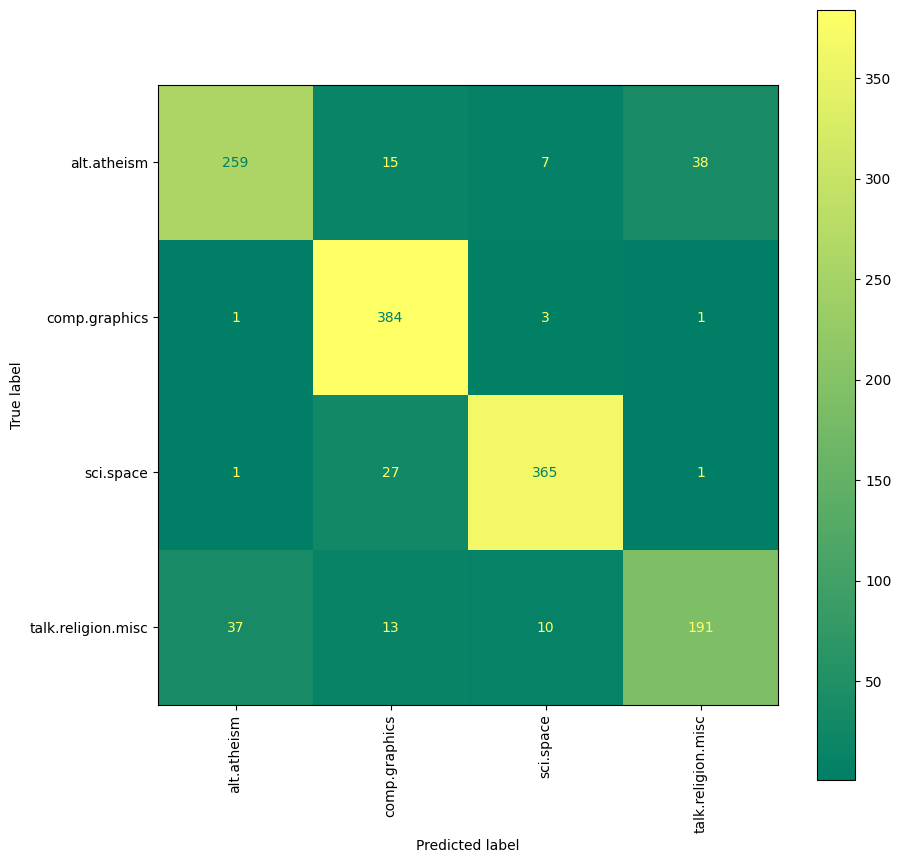

In [ ]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data_train.target_names
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, svm_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.869128,0.811912,0.839546,319.000000
1,0.874715,0.987147,0.927536,389.000000
2,0.948052,0.926396,0.937099,394.000000
3,0.826840,0.760956,0.792531,251.000000
accuracy,0.886179,0.886179,0.886179,0.886179
macro avg,0.879684,0.871603,0.874178,1353.000000
weighted avg,0.885872,0.886179,0.884530,1353.000000


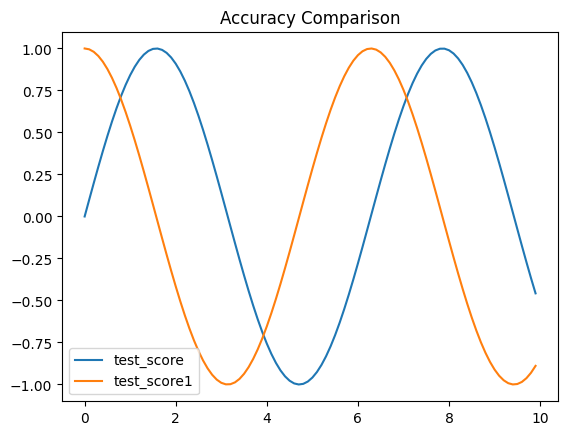

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate some random data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# plot the data
plt.plot(x, y1, label='test_score')
plt.plot(x, y2, label='test_score1')
plt.title('Accuracy Comparison')

# add a legend
plt.legend()

# show the plot
plt.show()
